In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ofa-ai-mastery-computer-vision/Sample_submission.csv
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/623.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/208.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/473.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/333.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/537.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/45.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/369.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/56.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/654.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/89.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/20.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/275.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/212.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/239.jpg
/kaggle/input/ofa-ai-mastery-computer-vision/test/test/

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [3]:
path = '/kaggle/input/ofa-ai-mastery-computer-vision'

In [4]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,horse,600
1,dog,900
2,cat,700
3,deer,600


<AxesSubplot:xlabel='Name of class', ylabel='Number of samples'>

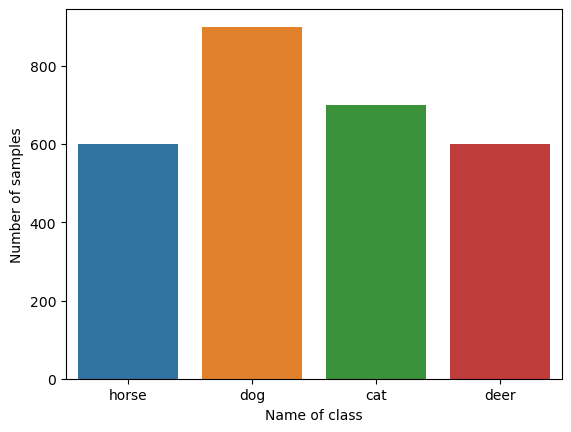

In [5]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

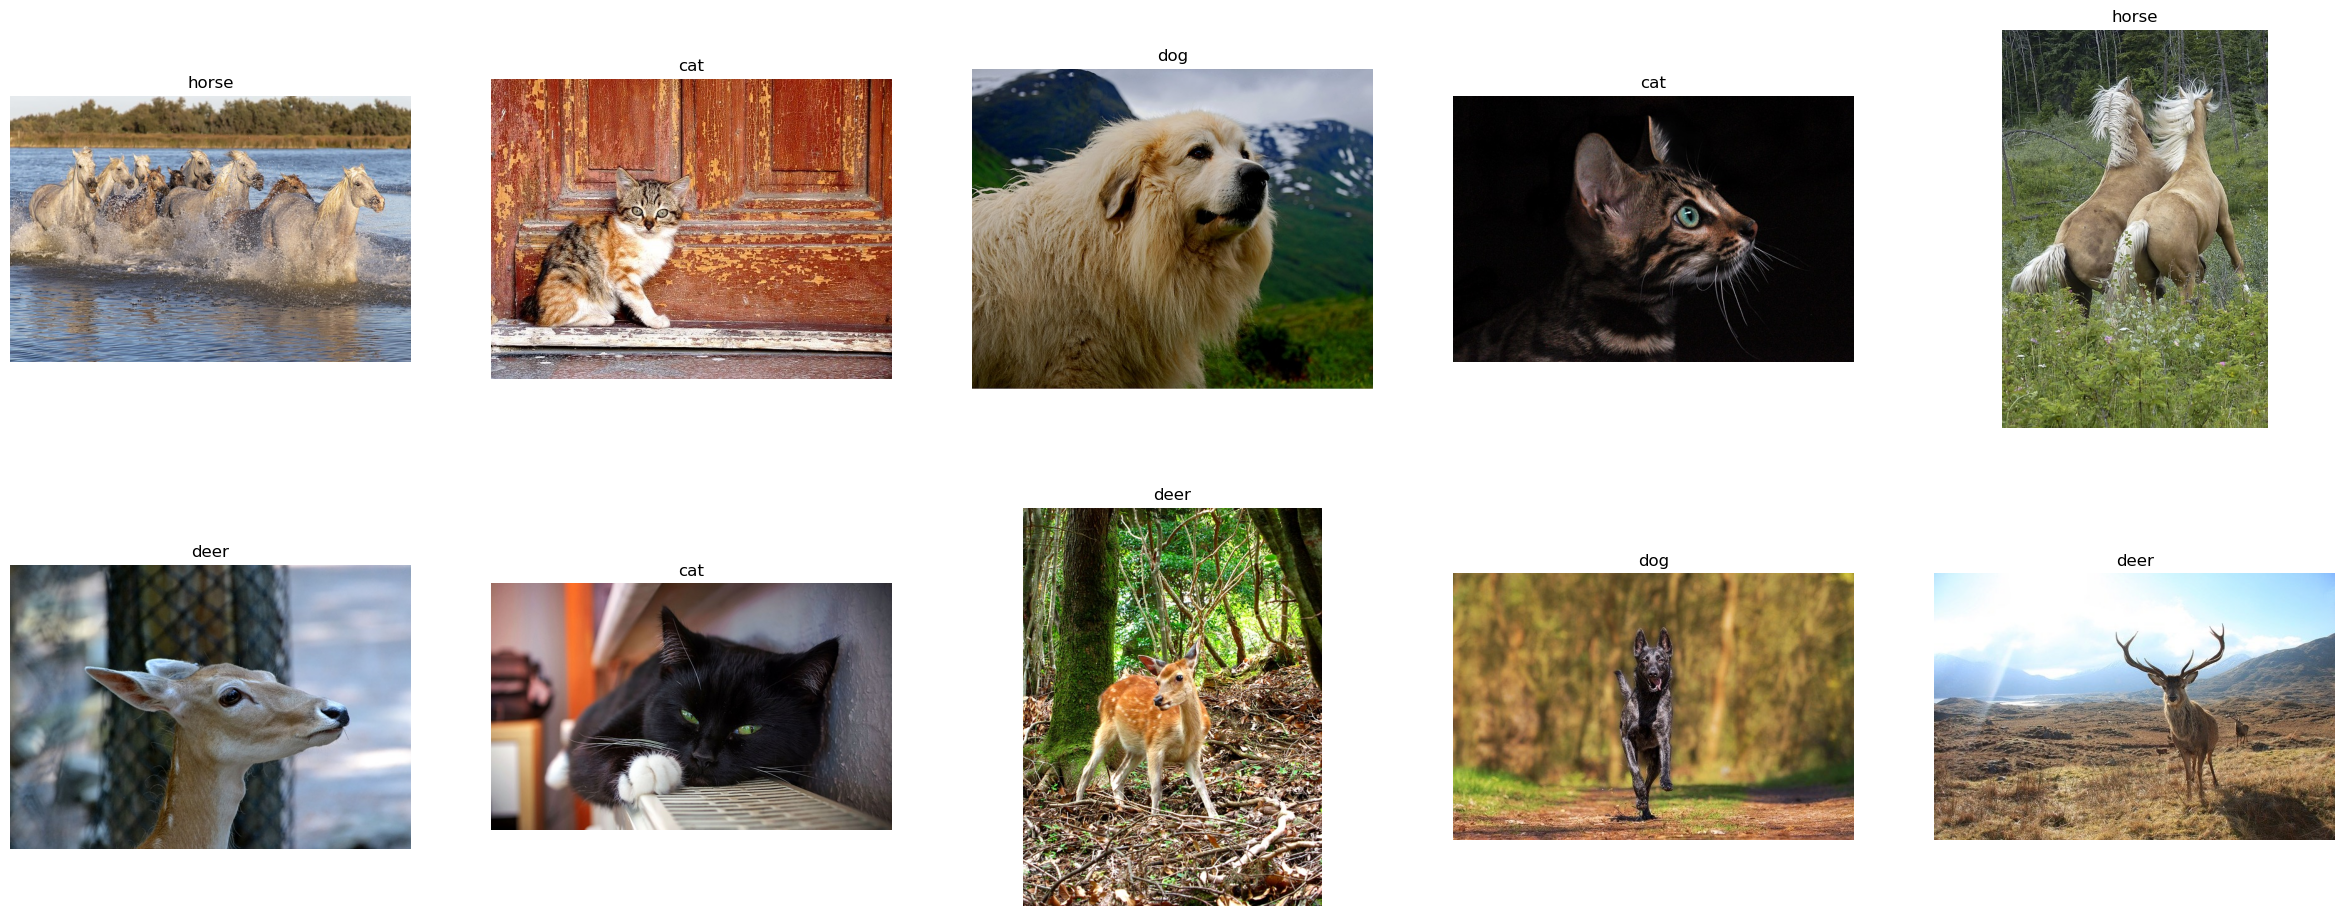

In [6]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

# 3. Preparing the data

In [7]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

In [8]:
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


# 4. Building the model

In [9]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer

mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

17225924/17225924 [==============================] - 1s 0us/step


In [10]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0004,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 classification (Dense)      (None, 4)                 1

# 5. Training and evaluating

In [11]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 50)

Epoch 1/50
70/70 [==============================] - 276s 4s/step - loss: 1.0023 - accuracy: 0.6058 - val_loss: 0.5724 - val_accuracy: 0.8500
Epoch 2/50
70/70 [==============================] - 265s 4s/step - loss: 0.4386 - accuracy: 0.8768 - val_loss: 0.3560 - val_accuracy: 0.8929
Epoch 3/50
70/70 [==============================] - 263s 4s/step - loss: 0.2814 - accuracy: 0.9183 - val_loss: 0.2674 - val_accuracy: 0.9179
Epoch 4/50
70/70 [==============================] - 262s 4s/step - loss: 0.2289 - accuracy: 0.9290 - val_loss: 0.2257 - val_accuracy: 0.9179
Epoch 5/50
70/70 [==============================] - 259s 4s/step - loss: 0.1734 - accuracy: 0.9478 - val_loss: 0.1902 - val_accuracy: 0.9232
Epoch 6/50
70/70 [==============================] - 260s 4s/step - loss: 0.1464 - accuracy: 0.9554 - val_loss: 0.1805 - val_accuracy: 0.9304
Epoch 7/50
70/70 [==============================] - 261s 4s/step - loss: 0.1340 - accuracy: 0.9500 - val_loss: 0.1510 - val_accuracy: 0.9446
Epoch 8/50
70

18/18 [==============================] - 18s 991ms/step - loss: 0.1422 - accuracy: 0.9607


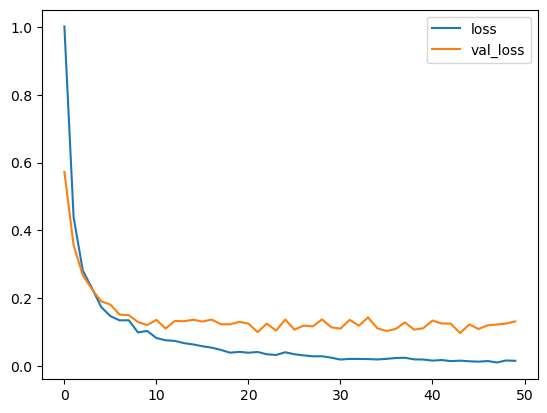

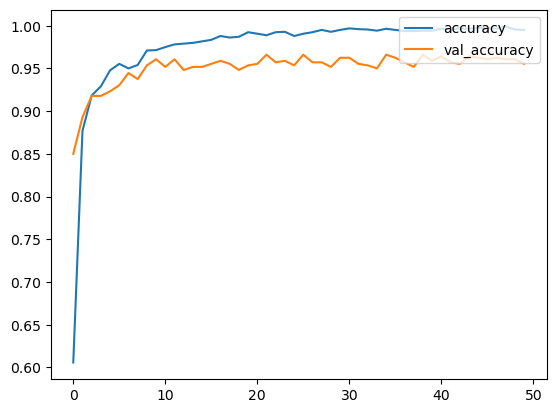

In [12]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

# 6. Preparing for submission

In [13]:
sub_csv ='/kaggle/input/ofa-ai-mastery-computer-vision/Sample_submission.csv'
path_test = path = '/kaggle/input/ofa-ai-mastery-computer-vision/test/test'

In [14]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [15]:
# each image will be treated individually and saved in a list which is then merged with the id of it's correspondence

from tensorflow.keras.preprocessing.image import load_img


# making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))


1/1 [==============================] - 0s 64ms/step


In [16]:
# we will replace the previous empty columns with the new predictions    
    
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


In [17]:
# saving file

df_sub.to_csv('submission.csv',index=False)